# カテゴリ値を含むデータでのLightGBMを使った分析

### データ
[Adult Data Set](https://archive.ics.uci.edu/ml/datasets/adult) \
[Adult Census Income](https://www.kaggle.com/datasets/uciml/adult-census-income) \
[Adult income dataset](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

### 参考
[lightgbmで二値分類の一連の流れをしたメモ](https://qiita.com/d_desuyon/items/807e01311ad08570ee78) \
[【初心者向け】特徴量重要度の算出 (LightGBM) 【Python】【機械学習】](https://mathmatical22.xyz/2020/04/12/%E3%80%90%E5%88%9D%E5%BF%83%E8%80%85%E5%90%91%E3%81%91%E3%80%91%E7%89%B9%E5%BE%B4%E9%87%8F%E9%87%8D%E8%A6%81%E5%BA%A6%E3%81%AE%E7%AE%97%E5%87%BA-lightgbm-%E3%80%90python%E3%80%91%E3%80%90%E6%A9%9F/) \
[LightGBMのCategorical Featureによって精度が向上するか？](https://qiita.com/sinchir0/items/b038757e578b790ec96a) \
[Pythonでしか描けない美しいデシジョンツリー（決定木）をlightGBMでも描こう！](https://qiita.com/hima2b4/items/b356e688ebdabc393da8) \
[LightGBM/XGBoostのtree構造可視化メモ](https://qiita.com/dyamaguc/items/70d4ce3548d49a6256fa) \
[Category Encodersでカテゴリ特徴量をストレスなく変換する](https://qiita.com/Hyperion13fleet/items/afa49a84bd5db65ffc31) \
[カテゴリ変数系特徴量の前処理(scikit-learnとcategory_encoders)](https://qiita.com/FukuharaYohei/items/06cc7b1c5eb124db6cdf)

In [1]:
!python -V

Python 3.9.13


In [2]:
!python -m pip --version

pip 23.0.1 from /opt/conda/lib/python3.9/site-packages/pip (python 3.9)


In [3]:
!python -m pip list

Package                       Version
----------------------------- -----------
aiofiles                      22.1.0
aiosqlite                     0.18.0
alembic                       1.9.4
anyio                         3.6.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asttokens                     2.2.1
async-generator               1.10
attrs                         22.2.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.11.2
bleach                        6.0.0
blinker                       1.5
brotlipy                      0.7.0
bs4                           0.0.1
category-encoders             2.6.0
certifi                       2022.12.7
certipy                       0.1.3
cffi                          1.15.1
charset-normalizer            3.0.1
cmaes                         0.9.1
colorama                      0.4.6
colorlog   

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, precision_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('adult_uci.csv')

In [6]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
columns_cat = [
    'workclass',
    'education',
    'marital.status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native.country',
    #'income',
]

In [9]:
{cat:'category' for cat in columns_cat}

{'workclass': 'category',
 'education': 'category',
 'marital.status': 'category',
 'occupation': 'category',
 'relationship': 'category',
 'race': 'category',
 'sex': 'category',
 'native.country': 'category'}

In [10]:
df = df.astype({cat:'category' for cat in columns_cat})

In [11]:
for cat in columns_cat:
    print(cat, df[cat].cat.categories)

workclass Index(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype='object')
education Index(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype='object')
marital.status Index(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
      dtype='object')
occupation Index(['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv',
       'Sales', 'Tech-support', 'Transport-moving'],
      dtype='object')
relationship Index(['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried',
       'Wife']

In [12]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [13]:
income_map = {'<=50K':0, '>50K':1}
df['income'] = df['income'].map(income_map).astype(int)

In [14]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education.num   32561 non-null  int64   
 5   marital.status  32561 non-null  category
 6   occupation      32561 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital.gain    32561 non-null  int64   
 11  capital.loss    32561 non-null  int64   
 12  hours.per.week  32561 non-null  int64   
 13  native.country  32561 non-null  category
 14  income          32561 non-null  int64   
dtypes: category(8), int64(7)
memory usage: 2.0 MB


In [16]:
#df['workclass'] = df['workclass'].replace('?',np.nan)
#df['occupation'] = df['occupation'].replace('?',np.nan)
#df['native.country'] = df['native.country'].replace('?',np.nan)
df = df.applymap(lambda d: np.nan if d=="?" else d)

In [17]:
df.isnull().sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [18]:
df = df.dropna(axis=0)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [20]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,1
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,1
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,1


In [21]:
workclass = ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']
{v:i for i, v in enumerate(workclass)}

{'Federal-gov': 0,
 'Local-gov': 1,
 'Never-worked': 2,
 'Private': 3,
 'Self-emp-inc': 4,
 'Self-emp-not-inc': 5,
 'State-gov': 6,
 'Without-pay': 7}

In [22]:
df['workclass'] = df['workclass'].map({v:i for i, v in enumerate(workclass)}).astype(int)

In [23]:
occupation = ['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']
{v:i for i, v in enumerate(occupation)}

{'Adm-clerical': 0,
 'Armed-Forces': 1,
 'Craft-repair': 2,
 'Exec-managerial': 3,
 'Farming-fishing': 4,
 'Handlers-cleaners': 5,
 'Machine-op-inspct': 6,
 'Other-service': 7,
 'Priv-house-serv': 8,
 'Prof-specialty': 9,
 'Protective-serv': 10,
 'Sales': 11,
 'Tech-support': 12,
 'Transport-moving': 13}

In [24]:
df['occupation'] = df['occupation'].map({v:i for i, v in enumerate(occupation)}).astype(int)

In [25]:
nativecountry = ['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']
{v:i for i, v in enumerate(nativecountry)}

{'Cambodia': 0,
 'Canada': 1,
 'China': 2,
 'Columbia': 3,
 'Cuba': 4,
 'Dominican-Republic': 5,
 'Ecuador': 6,
 'El-Salvador': 7,
 'England': 8,
 'France': 9,
 'Germany': 10,
 'Greece': 11,
 'Guatemala': 12,
 'Haiti': 13,
 'Holand-Netherlands': 14,
 'Honduras': 15,
 'Hong': 16,
 'Hungary': 17,
 'India': 18,
 'Iran': 19,
 'Ireland': 20,
 'Italy': 21,
 'Jamaica': 22,
 'Japan': 23,
 'Laos': 24,
 'Mexico': 25,
 'Nicaragua': 26,
 'Outlying-US(Guam-USVI-etc)': 27,
 'Peru': 28,
 'Philippines': 29,
 'Poland': 30,
 'Portugal': 31,
 'Puerto-Rico': 32,
 'Scotland': 33,
 'South': 34,
 'Taiwan': 35,
 'Thailand': 36,
 'Trinadad&Tobago': 37,
 'United-States': 38,
 'Vietnam': 39,
 'Yugoslavia': 40}

In [26]:
df['native.country'] = df['native.country'].map({v:i for i, v in enumerate(nativecountry)}).astype(int)

In [27]:
education = ['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']
{v:i for i, v in enumerate(education)}

{'10th': 0,
 '11th': 1,
 '12th': 2,
 '1st-4th': 3,
 '5th-6th': 4,
 '7th-8th': 5,
 '9th': 6,
 'Assoc-acdm': 7,
 'Assoc-voc': 8,
 'Bachelors': 9,
 'Doctorate': 10,
 'HS-grad': 11,
 'Masters': 12,
 'Preschool': 13,
 'Prof-school': 14,
 'Some-college': 15}

In [28]:
df['education'] = df['education'].map({v:i for i, v in enumerate(education)}).astype(int)

In [29]:
maritalstatus = ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']
{v:i for i, v in enumerate(maritalstatus)}

{'Divorced': 0,
 'Married-AF-spouse': 1,
 'Married-civ-spouse': 2,
 'Married-spouse-absent': 3,
 'Never-married': 4,
 'Separated': 5,
 'Widowed': 6}

In [30]:
df['marital.status'] = df['marital.status'].map({v:i for i, v in enumerate(maritalstatus)}).astype(int)

In [31]:
relationship = ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife']
{v:i for i, v in enumerate(relationship)}

{'Husband': 0,
 'Not-in-family': 1,
 'Other-relative': 2,
 'Own-child': 3,
 'Unmarried': 4,
 'Wife': 5}

In [32]:
df['relationship'] = df['relationship'].map({v:i for i, v in enumerate(relationship)}).astype(int)

In [33]:
race = ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']
{v:i for i, v in enumerate(race)}

{'Amer-Indian-Eskimo': 0,
 'Asian-Pac-Islander': 1,
 'Black': 2,
 'Other': 3,
 'White': 4}

In [34]:
df['race'] = df['race'].map({v:i for i, v in enumerate(race)}).astype(int)

In [35]:
sex = ['Female', 'Male']
{v:i for i, v in enumerate(sex)}

{'Female': 0, 'Male': 1}

In [36]:
df['sex'] = df['sex'].map({v:i for i, v in enumerate(sex)}).astype(int)

In [37]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0
5,34,3,216864,11,9,0,7,4,4,0,0,3770,45,38,0
6,38,3,150601,0,6,5,0,4,4,1,0,3770,40,38,0
7,74,6,88638,10,16,4,9,2,4,0,0,3683,20,38,1
8,68,0,422013,11,9,0,9,1,4,0,0,3683,40,38,0
10,45,3,172274,10,16,0,9,4,2,0,0,3004,35,38,1
11,38,5,164526,14,15,4,9,1,4,1,0,2824,45,38,1
12,52,3,129177,9,13,6,7,1,4,0,0,2824,20,38,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   workclass       30162 non-null  int64
 2   fnlwgt          30162 non-null  int64
 3   education       30162 non-null  int64
 4   education.num   30162 non-null  int64
 5   marital.status  30162 non-null  int64
 6   occupation      30162 non-null  int64
 7   relationship    30162 non-null  int64
 8   race            30162 non-null  int64
 9   sex             30162 non-null  int64
 10  capital.gain    30162 non-null  int64
 11  capital.loss    30162 non-null  int64
 12  hours.per.week  30162 non-null  int64
 13  native.country  30162 non-null  int64
 14  income          30162 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [39]:
import csv
df.to_csv('adult_uci_label.csv', index=False, header=True, encoding='UTF-8', sep=',', quoting=csv.QUOTE_ALL)

In [40]:
# 不要カラムの削除と並べ替え
df = df[["age",
         "workclass",
         #"fnlwgt",
         "education",
         "education.num",
         "marital.status",
         "occupation",
         "relationship",
         "race",
         "sex",
         "capital.gain",
         "capital.loss",
         "hours.per.week",
         "native.country",
         "income",]]
df.head(10)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,3,11,9,6,3,1,4,0,0,4356,18,38,0
3,54,3,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,15,10,5,9,3,4,0,0,3900,40,38,0
5,34,3,11,9,0,7,4,4,0,0,3770,45,38,0
6,38,3,0,6,5,0,4,4,1,0,3770,40,38,0
7,74,6,10,16,4,9,2,4,0,0,3683,20,38,1
8,68,0,11,9,0,9,1,4,0,0,3683,40,38,0
10,45,3,10,16,0,9,4,2,0,0,3004,35,38,1
11,38,5,14,15,4,9,1,4,1,0,2824,45,38,1
12,52,3,9,13,6,7,1,4,0,0,2824,20,38,1


In [41]:
X = df.drop(['income'], axis=1)
y = df['income']

#Creation of Train and Test dataset
X_train, X_test , y_train, y_test  = train_test_split(X      , y      , test_size=0.2, shuffle=False)

#Creation of Train and validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [42]:
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_valid.shape, y_valid.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (19303, 13)(19303,)
Validation dataset: (4826, 13)(4826,)
Test dataset: (6033, 13)(6033,)


In [43]:
# データセットを生成する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

In [44]:
# LightGBMのハイパーパラメータ
params = {
    # 二値分類問題
    'objective': 'binary',
    # AUCの最大化を目指す
    'metric': 'auc',
    # Fatalの場合出力
    'verbosity': -1,
    # 乱数シード
    'seed': 31,
    # 学習率
    'learning_rate': 0.02,
}

In [45]:
# 上記のパラメータでモデルを学習する
model = lgb.train(params,
                  train_set = lgb_train,
                  valid_sets = lgb_valid,
                  verbose_eval = 50,  # 50イテレーション毎に学習結果出力
                  num_boost_round = 10000,  # 最大イテレーション回数指定
                  early_stopping_rounds = 100
                 )

Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.889319
[100]	valid_0's auc: 0.895645


/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[150]	valid_0's auc: 0.899816
[200]	valid_0's auc: 0.901796
[250]	valid_0's auc: 0.90223
[300]	valid_0's auc: 0.902354
[350]	valid_0's auc: 0.902823
[400]	valid_0's auc: 0.902819
Early stopping, best iteration is:
[342]	valid_0's auc: 0.902848


In [46]:
# テストデータを予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

AUC 0.8910138387640286


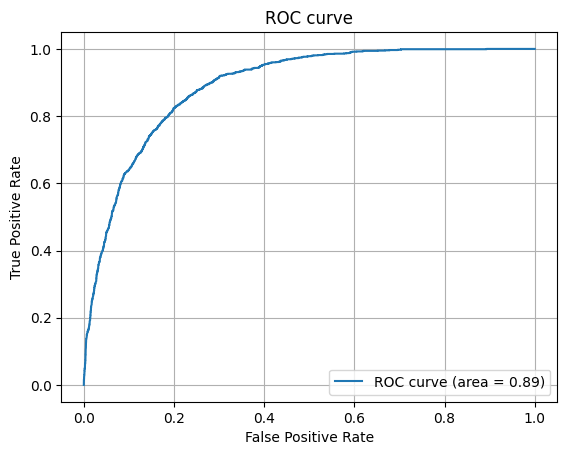

accuracy 0.8529753025029008
precision 0.6713665943600867


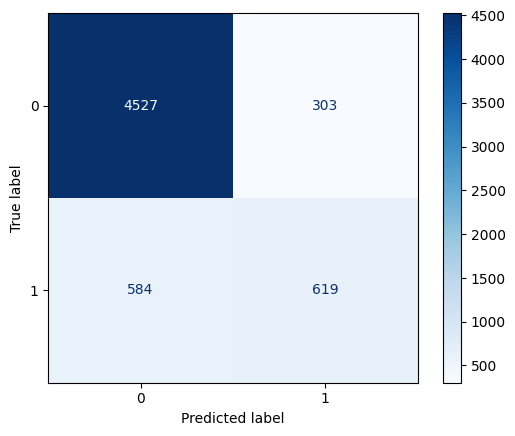

In [47]:
# AUCを計算
fpr, tpr, thresholds = roc_curve(np.asarray(y_test), y_pred)
print("AUC", auc(fpr, tpr))

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc(fpr, tpr))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

# accuracy, precisionを計算
acc = accuracy_score(np.asarray(y_test), np.round(y_pred))
precision = precision_score(np.asarray(y_test), np.round(y_pred))
print("accuracy", acc)
print("precision", precision)

# 混同行列をプロット
y_pred = np.round(y_pred)
cm = confusion_matrix(np.asarray(y_test), np.where(y_pred < 0.5, 0, 1))
cmp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
cmp.plot(cmap=plt.cm.Blues)
plt.show()

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

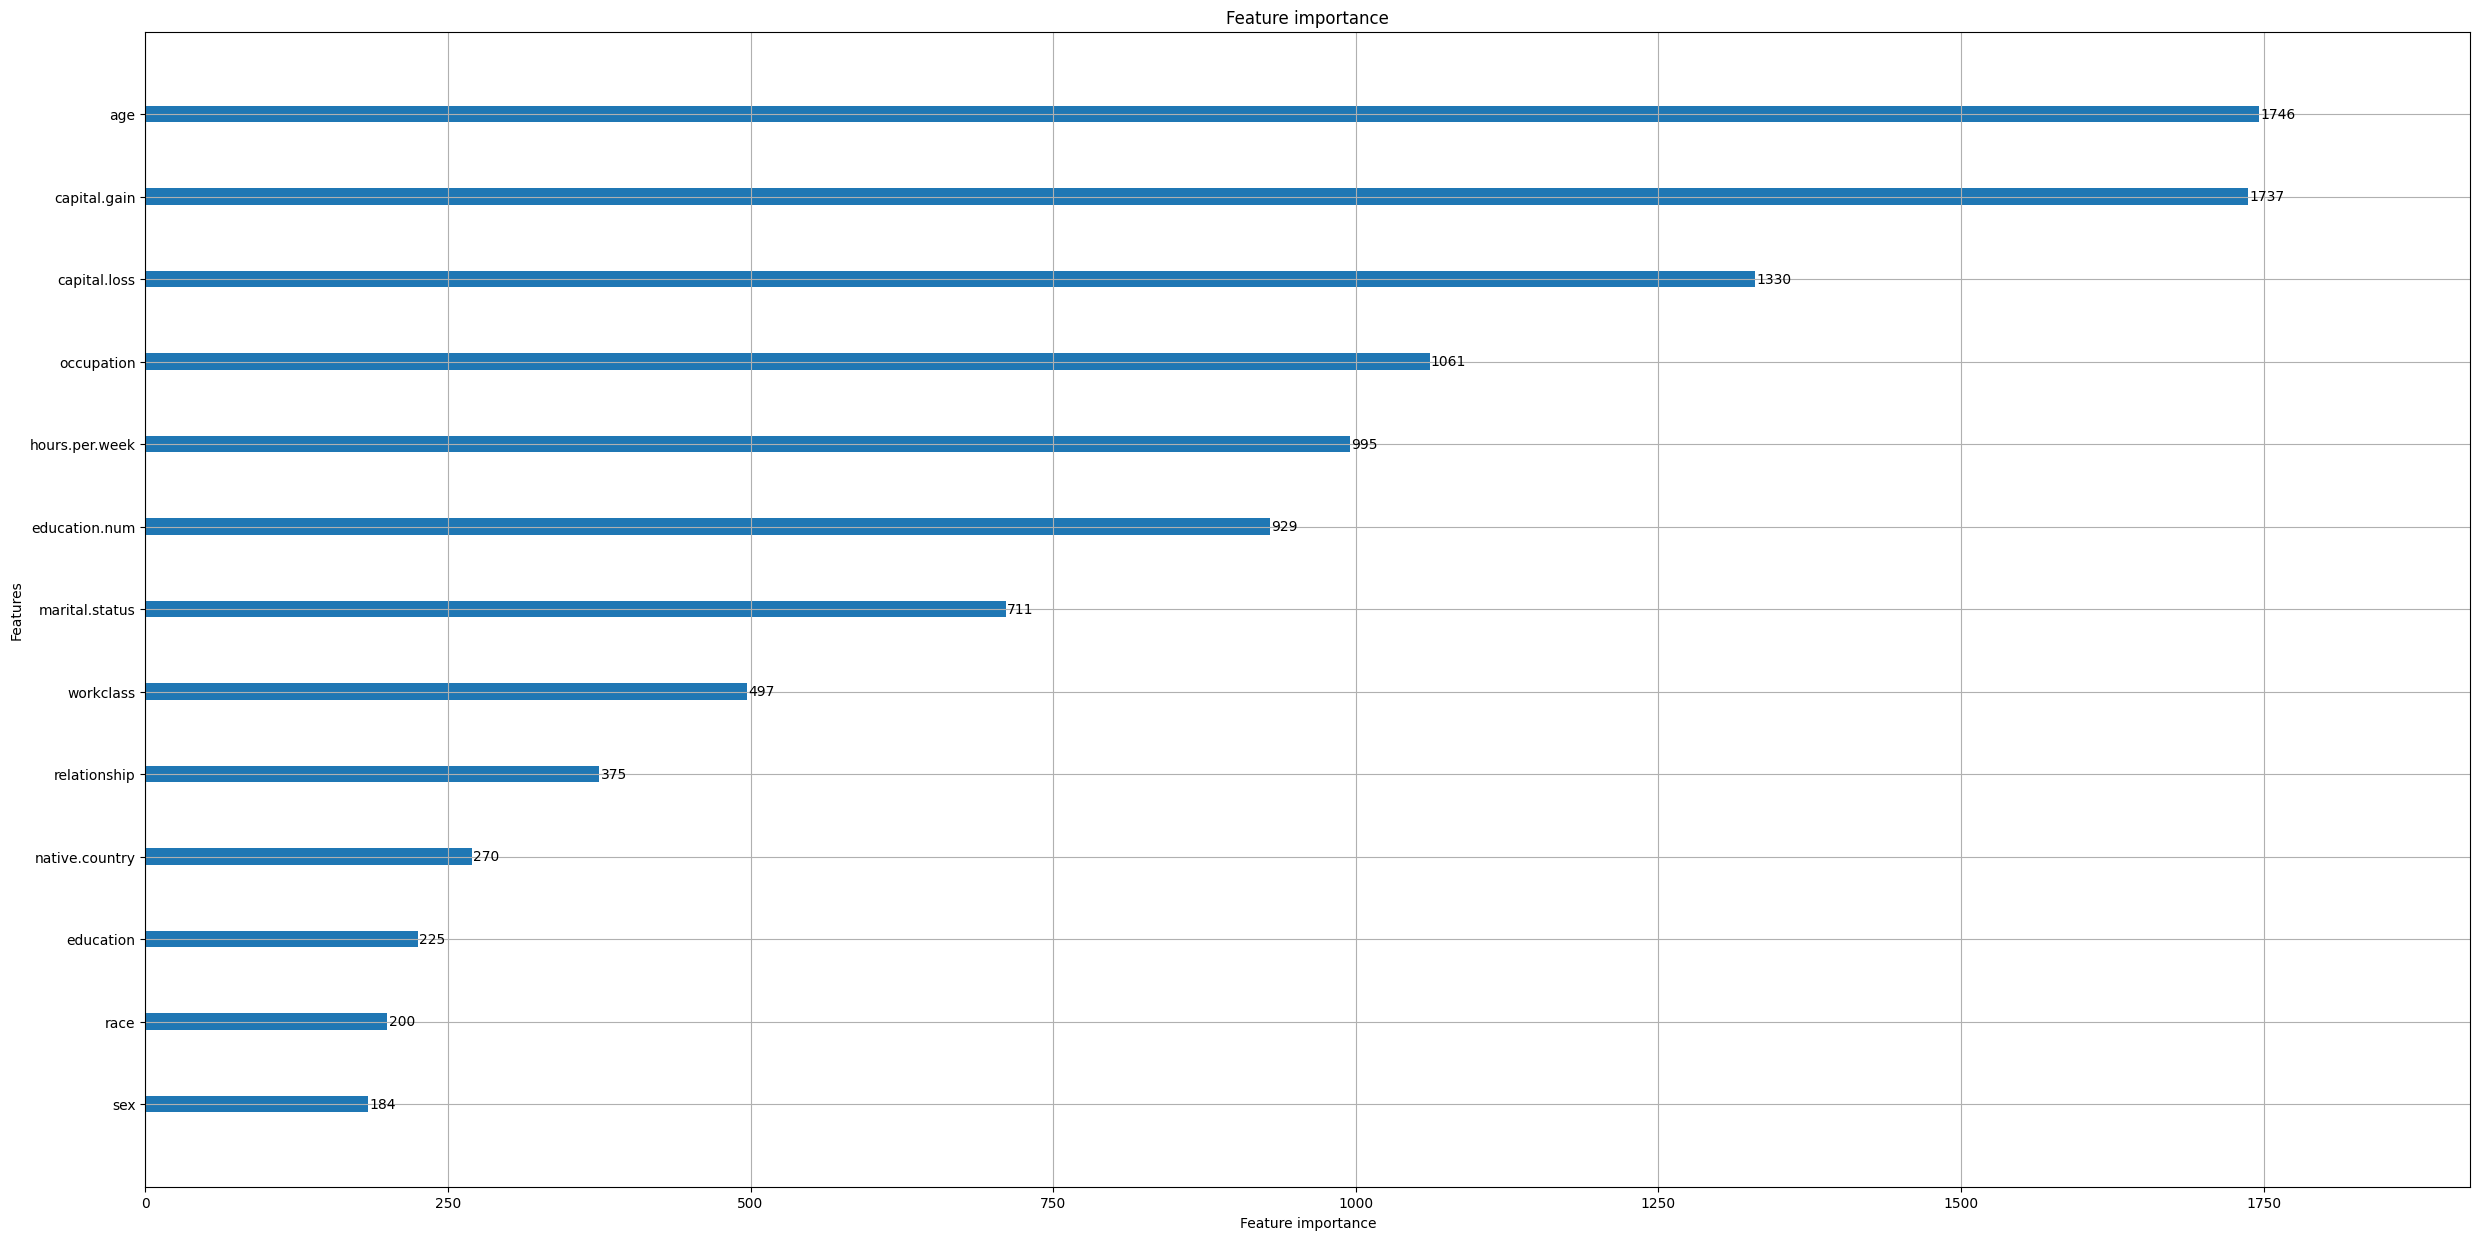

In [48]:
# 重要度としては「特徴量が分岐（ノード）の条件式で使用された回数」（＝デフォルト）
lgb.plot_importance(model, figsize=(30, 15), max_num_features=30, importance_type='split')

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

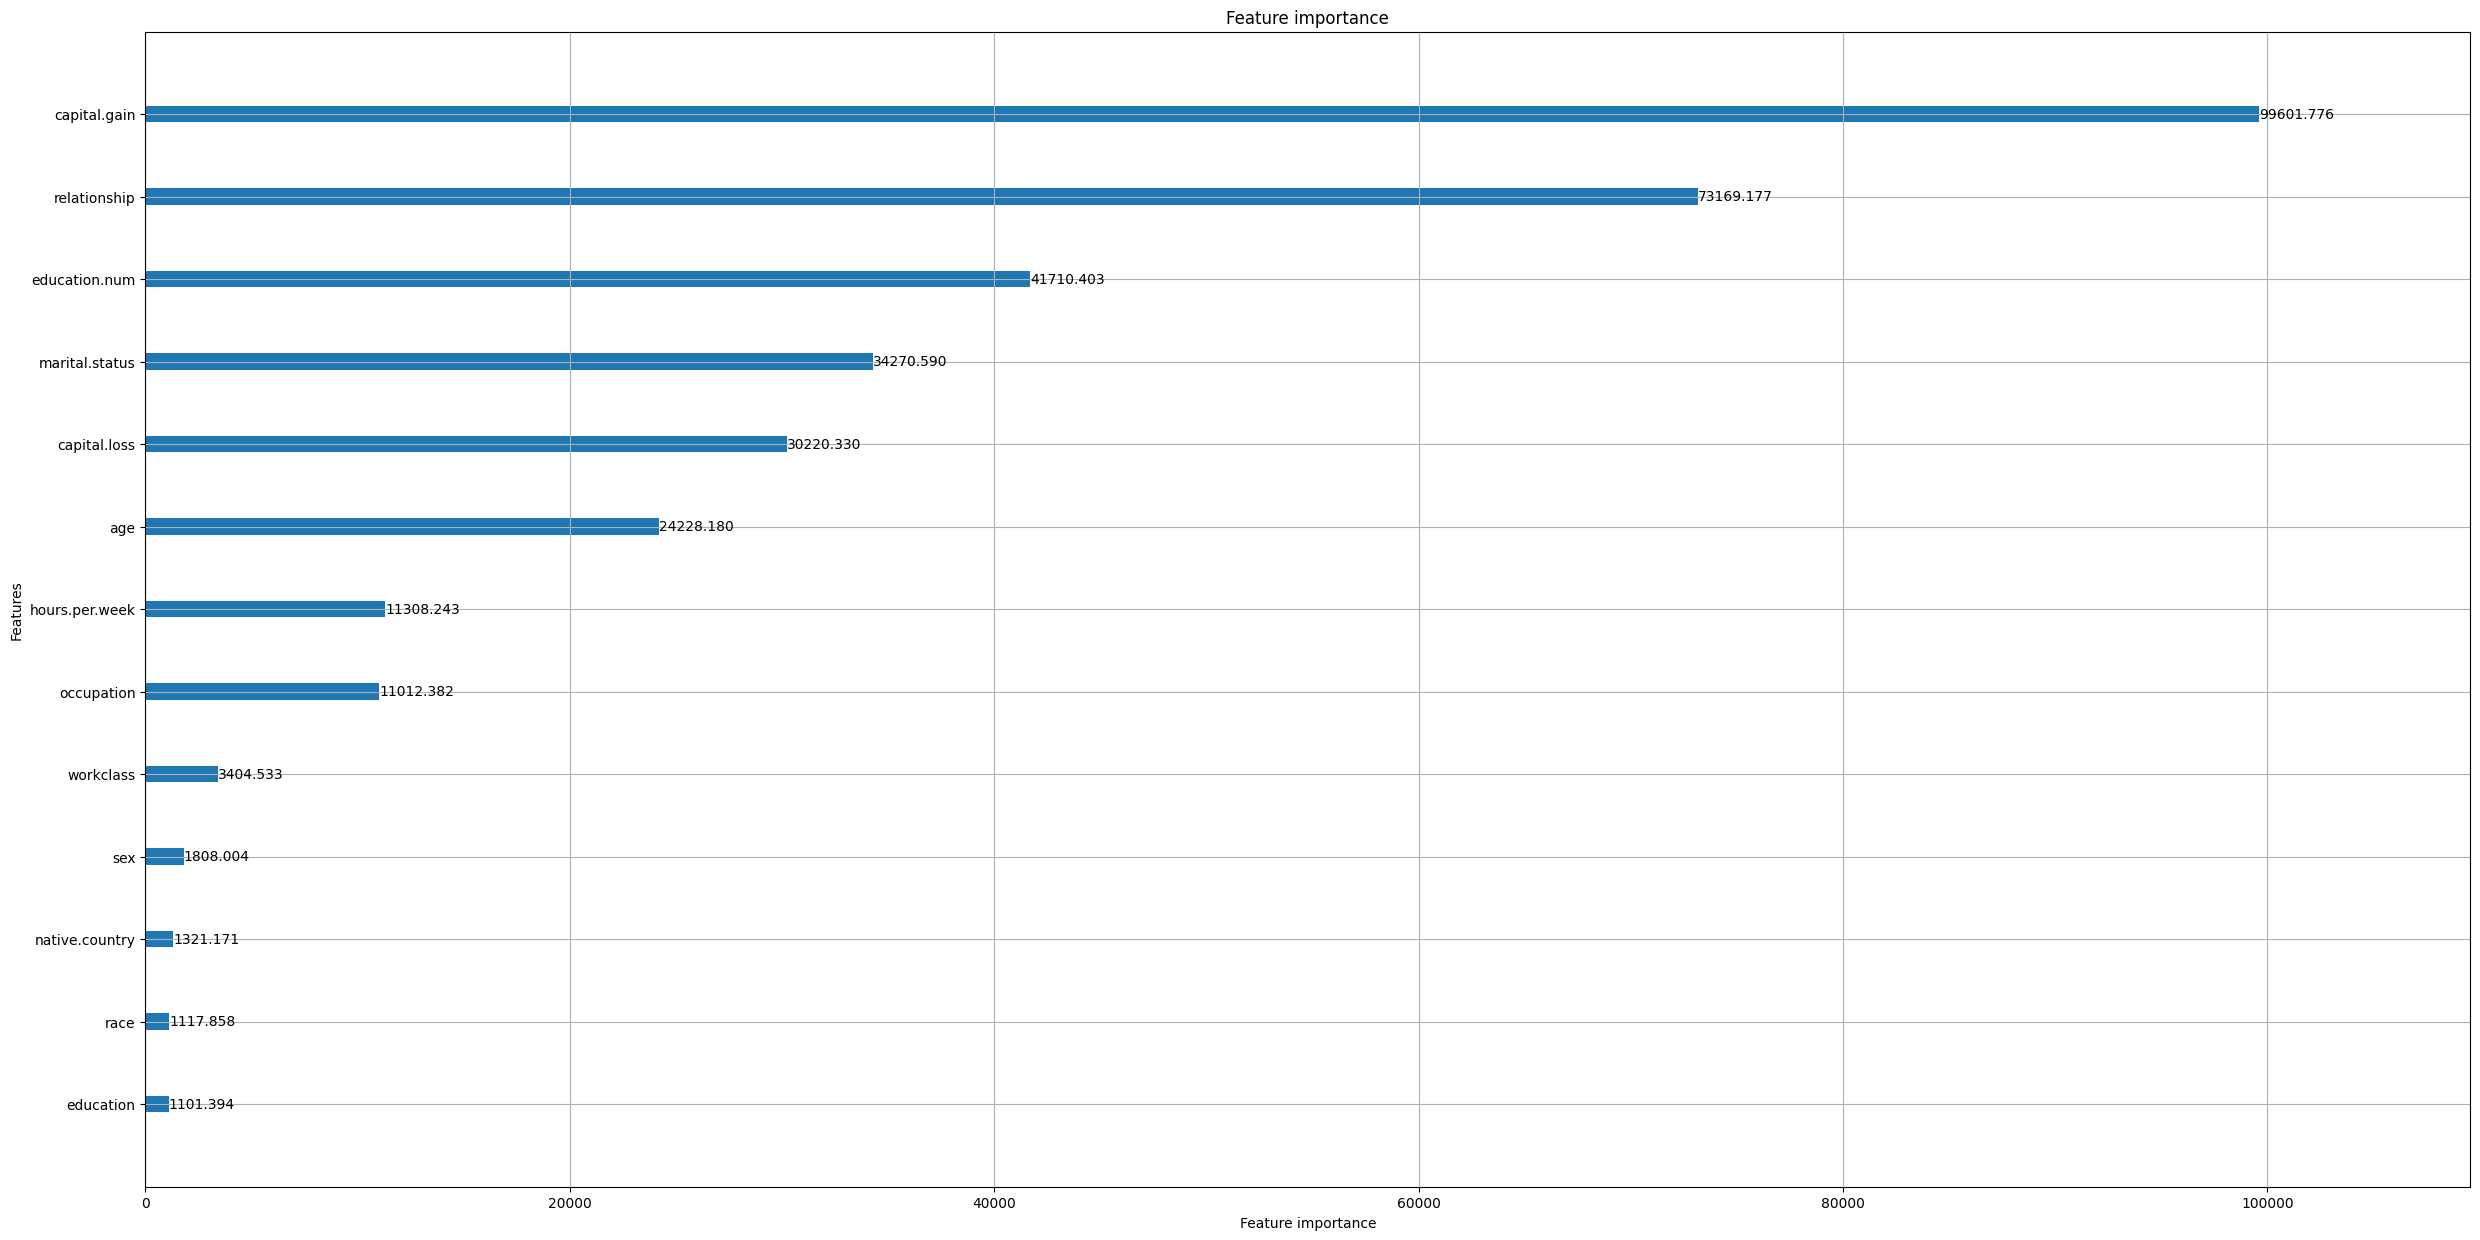

In [49]:
# 重要度としては「特徴量がある分岐（ノード）において目的関数の改善に寄与した度合い」
lgb.plot_importance(model, figsize=(30, 15), max_num_features=30, importance_type='gain')

In [50]:
# データフレームを綺麗に出力する関数
import IPython
def display(*dfs, head=True):
    for df in dfs:
        IPython.display.display(df.head() if head else df)

In [51]:
# 特徴量重要度を棒グラフでプロットする関数 
def plot_feature_importance(df): 
    n_features = len(df)                              # 特徴量数(説明変数の個数) 
    df_plot = df.sort_values('importance')            # df_importanceをプロット用に特徴量重要度を昇順ソート 
    f_importance_plot = df_plot['importance'].values  # 特徴量重要度の取得 
    plt.barh(range(n_features), f_importance_plot, align='center') 
    cols_plot = df_plot['feature'].values             # 特徴量の取得 
    plt.yticks(np.arange(n_features), cols_plot)      # x軸,y軸の値の設定
    plt.xlabel('Feature importance')                  # x軸のタイトル
    plt.ylabel('Feature')                             # y軸のタイトル

In [52]:
# 特徴量重要度の算出 (データフレームで取得)
cols = list(df.drop('income',axis=1).columns) # 特徴量名のリスト(目的変数target以外)
# 特徴量重要度の算出方法 'gain'(推奨) : トレーニングデータの損失の減少量を評価
f_importance = np.array(model.feature_importance(importance_type='gain')) # 特徴量重要度の算出
f_importance = f_importance / np.sum(f_importance) # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

,feature,importance
9,capital.gain,0.297964
6,relationship,0.218890
3,education.num,0.124779
4,marital.status,0.102522
10,capital.loss,0.090406


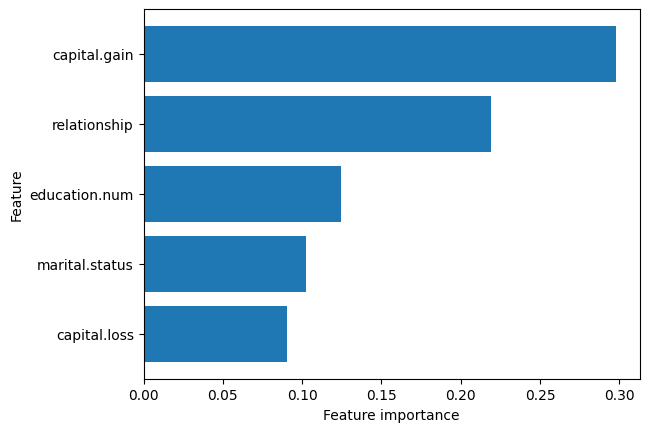

In [53]:
# 特徴量重要度の可視化
n_display = 5 # 上位10個に制限
plot_feature_importance(df_importance.iloc[:n_display,:])

In [54]:
import csv
# 決定木をDataFrameに変換
model.trees_to_dataframe().to_csv('adult_uci_label_decisiontree.csv', index=False, header=True, encoding='UTF-8', sep=',', quoting=csv.QUOTE_ALL)

In [55]:
df_tree = pd.read_csv('adult_uci_label_decisiontree.csv')

In [56]:
df_tree.head(10)

,tree_index,node_depth,node_index,left_child,right_child,parent_index,split_feature,split_gain,threshold,decision_type,missing_direction,missing_type,value,weight,count
0,0,1,0-S0,0-S1,0-S12,NaN,capital.gain,3654.139893,5.036500e+03,<=,left,None,-0.961185,0.000000,19303
1,0,2,0-S1,0-S2,0-S3,0-S0,relationship,2311.600098,1.000000e-35,<=,left,None,-0.966826,3563.170000,17806
2,0,3,0-S2,0-S4,0-S6,0-S1,education.num,1071.709961,1.250000e+01,<=,left,None,-0.947329,1445.600000,7224
3,0,4,0-S4,0-S8,0-S5,0-S2,capital.loss,292.679993,1.789000e+03,<=,left,None,-0.958106,1038.770000,5191
4,0,5,0-S8,0-L0,0-S9,0-S4,education.num,146.408005,8.500000e+00,<=,left,None,-0.960827,974.739000,4871
5,0,6,0-L0,NaN,NaN,0-S8,NaN,NaN,NaN,NaN,NaN,NaN,-0.978646,155.085818,775
6,0,6,0-S9,0-S25,0-S14,0-S8,age,138.854004,3.550000e+01,<=,left,None,-0.957455,819.654000,4096
7,0,7,0-S25,0-L9,0-L26,0-S9,age,22.739799,2.850000e+01,<=,left,None,-0.969247,268.549000,1342
8,0,8,0-L9,NaN,NaN,0-S25,NaN,NaN,NaN,NaN,NaN,NaN,-0.977387,90.850273,454
9,0,8,0-L26,NaN,NaN,0-S25,NaN,NaN,NaN,NaN,NaN,NaN,-0.965086,177.698331,888


In [57]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20862 entries, 0 to 20861
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tree_index         20862 non-null  int64  
 1   node_depth         20862 non-null  int64  
 2   node_index         20862 non-null  object 
 3   left_child         10260 non-null  object 
 4   right_child        10260 non-null  object 
 5   parent_index       20520 non-null  object 
 6   split_feature      10260 non-null  object 
 7   split_gain         10260 non-null  float64
 8   threshold          10260 non-null  float64
 9   decision_type      10260 non-null  object 
 10  missing_direction  10260 non-null  object 
 11  missing_type       10260 non-null  object 
 12  value              20862 non-null  float64
 13  weight             20862 non-null  float64
 14  count              20862 non-null  int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 2.4+ MB
